In [1]:
# Import packages
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import yfinance as yf

# Import MlFinLab tools
from mlfinlab.labeling import return_over_benchmark

register_matplotlib_converters()

In [2]:
# Load price data
msft = yf.Ticker('MSFT')
msft_df = msft.history(start='2020-3-1', end ='2020-5-1')
spy = yf.Ticker('SPY')
spy_df = spy.history(start='2020-3-1', end ='2020-5-1')

# Closing prices
msft_price = msft_df['Close']
spy_price = spy_df['Close']

# SPY return for benchmark
spy_returns = spy_price.pct_change(periods=1)
msft_returns = msft_price.pct_change(periods=1)

In [3]:
return1 = return_over_benchmark(prices=msft_price, benchmark=0.005, binary=True, lag=False)
return1.value_counts()

-1.0    24
 1.0    18
Name: Close, dtype: int64

In [4]:
returns2 = return_over_benchmark(prices=msft_price, benchmark=spy_returns, binary=True, lag=False)
returns2.value_counts()

 1.0    25
-1.0    17
Name: Close, dtype: int64

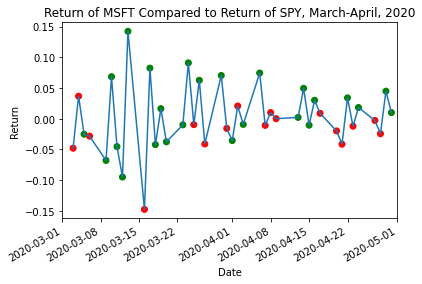

In [5]:
# Set color for points, green for over benchmark, red for below
color = returns2.apply(lambda x: 'g' if x==1 else 'r')

fig, ax = plt.subplots()
ax.scatter(msft_price.index, msft_returns, color=color.to_list())
ax.plot(msft_price.index, msft_returns)
fig.autofmt_xdate()
ax.set_xlim([dt.date(2020, 3, 1), dt.date(2020, 5, 1)])
ax.set_xlabel('Date')
ax.set_ylabel('Return')
ax.set_title('Return of MSFT Compared to Return of SPY, March-April, 2020');

In [6]:
tickers = "AAPL MSFT COST PFE SYY F GE BABA AMD CCL ZM FB WFC JPM NVDA CVX"

data = yf.download(tickers, start="1980-01-01", end="2020-05-01", group_by="ticker")
data = data.loc[:, (slice(None), 'Adj Close')]
data.columns = data.columns.droplevel(1)
data.resample('Y').last().head()  

[*********************100%***********************]  16 of 16 completed


,ZM,BABA,NVDA,MSFT,CVX,SYY,FB,PFE,GE,AMD,WFC,AAPL,F,COST,CCL,JPM
Date,,,,,,,,,,,,,,,,
1979-12-31,NaN,NaN,NaN,NaN,1.560250,0.119001,NaN,0.217056,2.400966,NaN,0.246001,NaN,0.277584,NaN,NaN,NaN
1980-12-31,NaN,NaN,NaN,NaN,2.753786,0.202755,NaN,0.303817,3.072454,5.75000,0.294544,0.119234,0.190504,NaN,NaN,1.452192
1981-12-31,NaN,NaN,NaN,NaN,2.373240,0.307528,NaN,0.313776,3.030201,2.93750,0.258084,0.077305,0.169289,NaN,NaN,1.856762
1982-12-31,NaN,NaN,NaN,NaN,1.771280,0.609235,NaN,0.418723,5.253694,6.28125,0.290430,0.104385,0.392902,NaN,NaN,2.069692
1983-12-31,NaN,NaN,NaN,NaN,1.916582,0.564609,NaN,0.447663,6.716887,16.81250,0.418475,0.085167,0.649768,NaN,NaN,2.248555


In [7]:
# Get the labels as a flat array
returns15 = return_over_benchmark(prices=data, benchmark=0.15, binary=True, resample_by='Y', lag=True).values.flatten()
returns25 = return_over_benchmark(prices=data, benchmark=0.25, binary=True, resample_by='Y', lag=True).values.flatten()
returns35 = return_over_benchmark(prices=data, benchmark=0.35, binary=True, resample_by='Y', lag=True).values.flatten()

# Get the count of positive returns, ignoring NaN
_, count15 = np.unique(returns15[~np.isnan(returns15)], return_counts=True)  # Given as [count of -1, count of 1]
_, count25 = np.unique(returns25[~np.isnan(returns25)], return_counts=True)
_, count35 = np.unique(returns35[~np.isnan(returns35)], return_counts=True)

# Get the ratio of positive labels to all labels
ratio15 = count15[1]/count15.sum()
ratio25 = count25[1]/count25.sum()
ratio35 = count35[1]/count35.sum()
ratio15, ratio25, ratio35

(0.4990059642147117, 0.3797216699801193, 0.27634194831013914)

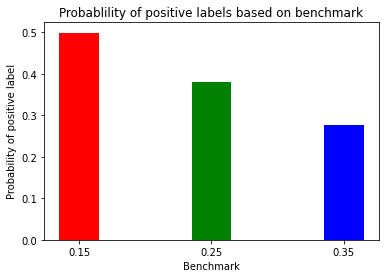

In [8]:
ax = plt.bar(['0.15', '0.25', '0.35'], [ratio15, ratio25, ratio35], width=0.3, color=['r', 'g', 'b'])
plt.xlabel('Benchmark')
plt.ylabel('Probability of positive label')
plt.title('Probablility of positive labels based on benchmark');